In [1]:
# Load and display the health and wellness data
import pandas as pd

df = pd.read_csv(r'C:\Users\Alex Jarboe\Downloads\simulated_health_wellness_data.csv')
print(df.head(20))

    Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0           34.967142                      5               7.618856   
1           28.617357                      8               4.105473   
2           36.476885                      4               6.024123   
3           45.230299                      1               8.565319   
4           27.658466                      3               8.301648   
5           27.658630                      0               7.424548   
6           45.792128                      0               4.975805   
7           37.674347                      2               7.878255   
8           25.305256                      4               8.070099   
9           35.425600                      1               7.070526   
10          25.365823                      5               8.834756   
11          25.342702                      3               5.974852   
12          32.419623                      0               6.235214   
13    

In [3]:
# Summary statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  


Summary Statistics:
       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  


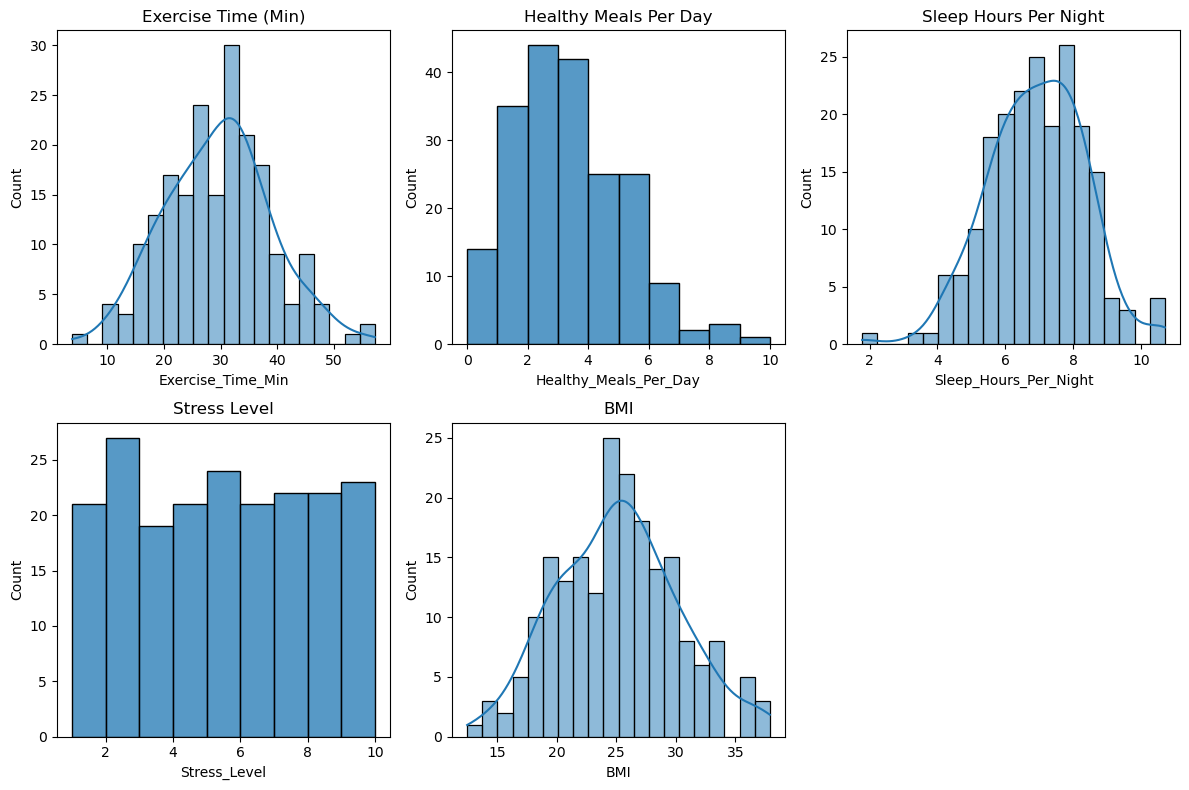

Correlation Matrix:
                       Exercise_Time_Min  Healthy_Meals_Per_Day  \
Exercise_Time_Min               1.000000               0.012108   
Healthy_Meals_Per_Day           0.012108               1.000000   
Sleep_Hours_Per_Night          -0.072788              -0.046462   
Stress_Level                    0.001472              -0.080870   
BMI                             0.068954               0.024974   

                       Sleep_Hours_Per_Night  Stress_Level       BMI  
Exercise_Time_Min                  -0.072788      0.001472  0.068954  
Healthy_Meals_Per_Day              -0.046462     -0.080870  0.024974  
Sleep_Hours_Per_Night               1.000000     -0.073312 -0.057563  
Stress_Level                       -0.073312      1.000000 -0.131471  
BMI                                -0.057563     -0.131471  1.000000  


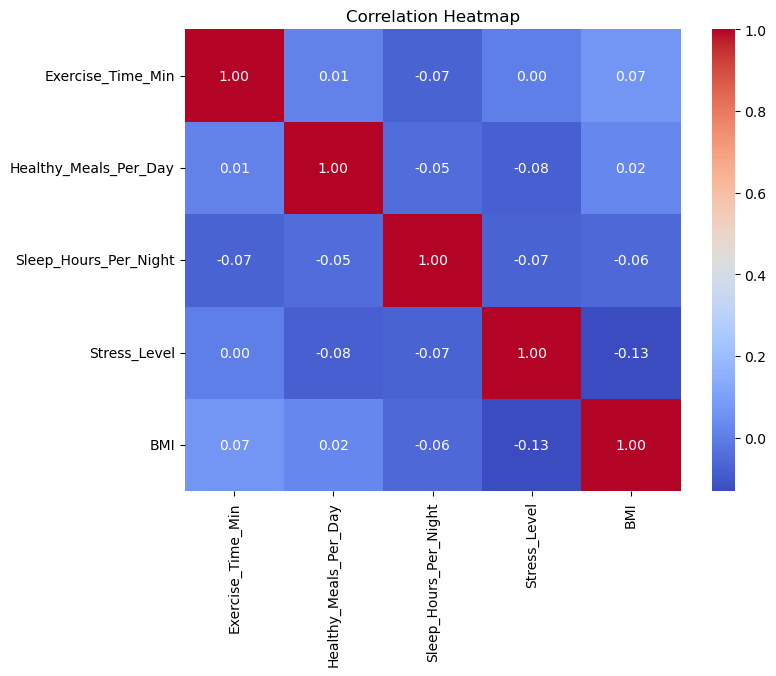

In [5]:
# Conducting exploratory data analysis on the health and wellness data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary Statistics
summary_stats = df.describe()
print('Summary Statistics:')
print(summary_stats)

# 2. Data Visualization: Distribution Plots for each variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df['Exercise_Time_Min'], kde=True, bins=20)
plt.title('Exercise Time (Min)')

plt.subplot(2, 3, 2)
sns.histplot(df['Healthy_Meals_Per_Day'], kde=False, bins=range(int(df['Healthy_Meals_Per_Day'].min()), int(df['Healthy_Meals_Per_Day'].max())+2))
plt.title('Healthy Meals Per Day')

plt.subplot(2, 3, 3)
sns.histplot(df['Sleep_Hours_Per_Night'], kde=True, bins=20)
plt.title('Sleep Hours Per Night')

plt.subplot(2, 3, 4)
sns.histplot(df['Stress_Level'], kde=False, bins=range(int(df['Stress_Level'].min()), int(df['Stress_Level'].max())+2))
plt.title('Stress Level')

plt.subplot(2, 3, 5)
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title('BMI')

plt.tight_layout()
plt.show()

# 3. Correlation Analysis
corr_matrix = df.corr()
print('Correlation Matrix:')
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Regression Analysis for dependent variable: Exercise_Time_Min
                            OLS Regression Results                            
Dep. Variable:      Exercise_Time_Min   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4721
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.756
Time:                        21:03:20   Log-Likelihood:                -728.54
No. Observations:                 200   AIC:                             1467.
Df Residuals:                     195   BIC:                             1484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

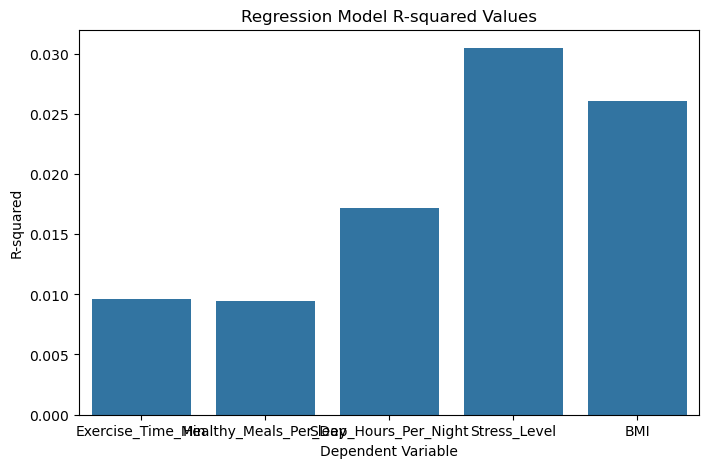

In [7]:
# Perform regression analysis on all possible combinations of variables
# In this case, we'll consider each variable as the dependent variable and the remaining variables as predictors.
import statsmodels.api as sm

results = {}

for target in df.columns:
    predictors = [col for col in df.columns if col != target]
    X = df[predictors]
    X = sm.add_constant(X)  # adds intercept
    y = df[target]
    model = sm.OLS(y, X).fit()
    results[target] = model
    print('Regression Analysis for dependent variable: ' + target)
    print(model.summary())
    print('\
' + '='*80 + '\
')

# Additionally, print a summary table with R-squared for each model
summary_table = []
for target, model in results.items():
    summary_table.append({'Dependent Variable': target, 'R-squared': model.rsquared})

summary_df = pd.DataFrame(summary_table)
print('Summary of Regression Models (R-squared values):')
print(summary_df)

# Optionally, plot the R-squared values
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Dependent Variable', y='R-squared', data=summary_df)
ax.set_title('Regression Model R-squared Values')
plt.show()

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

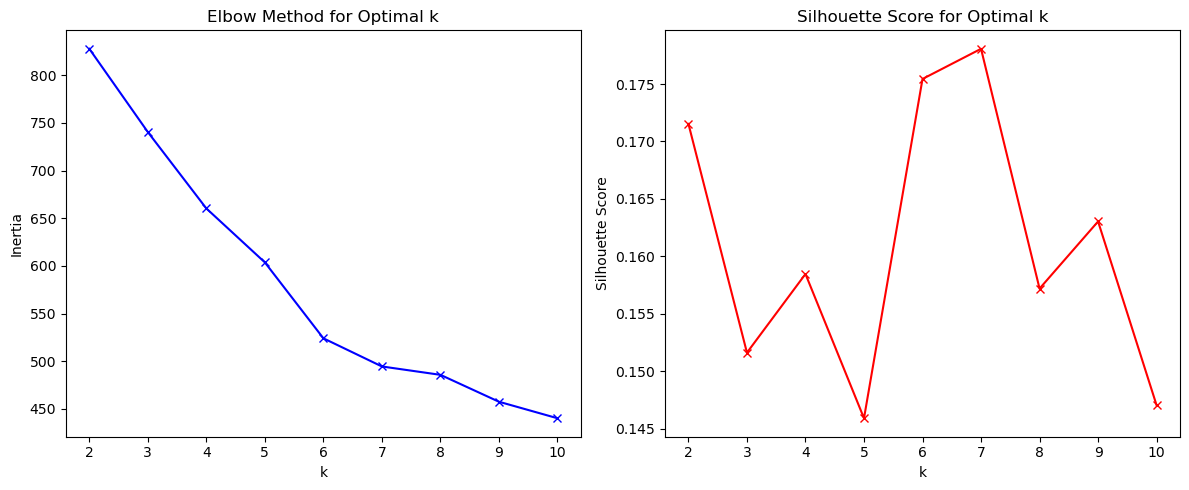

Silhouette Scores for different k:
k=2: 0.172
k=3: 0.152
k=4: 0.158
k=5: 0.146
k=6: 0.175
k=7: 0.178
k=8: 0.157
k=9: 0.163
k=10: 0.147


In [9]:
# First, let's standardize the data and determine optimal number of clusters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

# Determine optimal k for K-means using elbow method and silhouette score
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

# Print silhouette scores
print("\
Silhouette Scores for different k:")
for k, score in zip(K, silhouette_scores):
    print(f"k={k}: {score:.3f}")

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Characteristics:
Cluster Centers:
   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          20.309173               1.567568               6.163989   
1          30.061045               3.373333               7.292322   
2          27.934524               4.295455               7.025782   
3          38.257301               1.704545               6.877052   

   Stress_Level        BMI  
0      5.108108  22.453370  
1      2.453333  27.269963  
2      7.363636  22.056787  
3      6.863636  26.897297  
Cluster Sizes:
Cluster
1    75
2    44
3    44
0    37
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

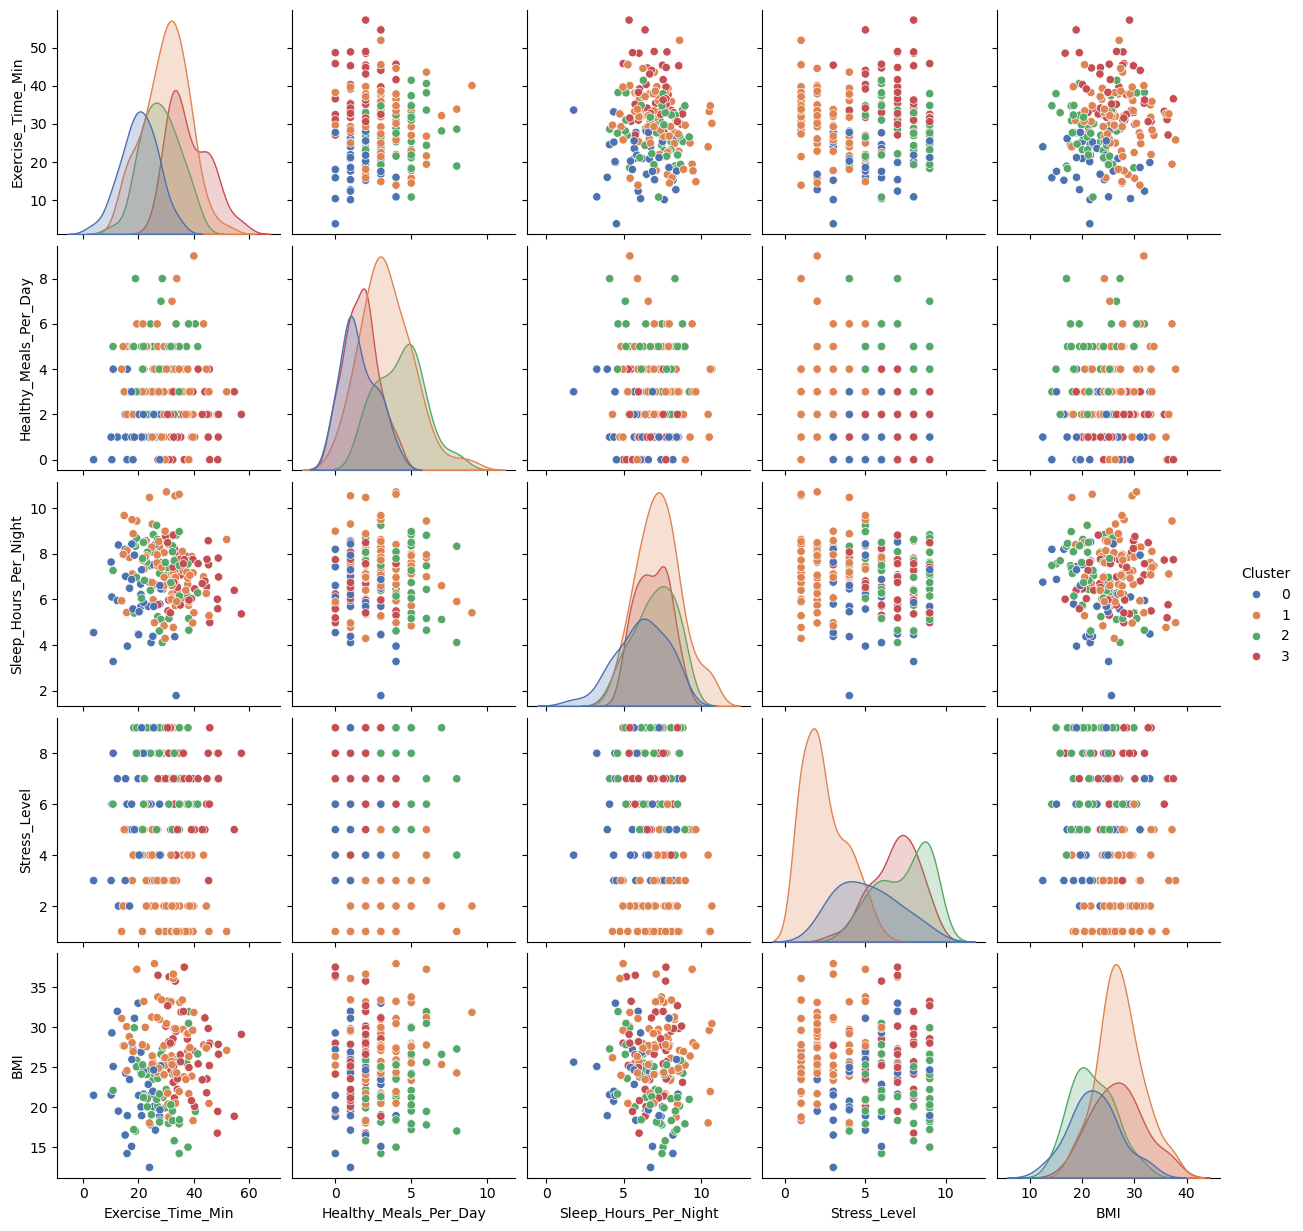

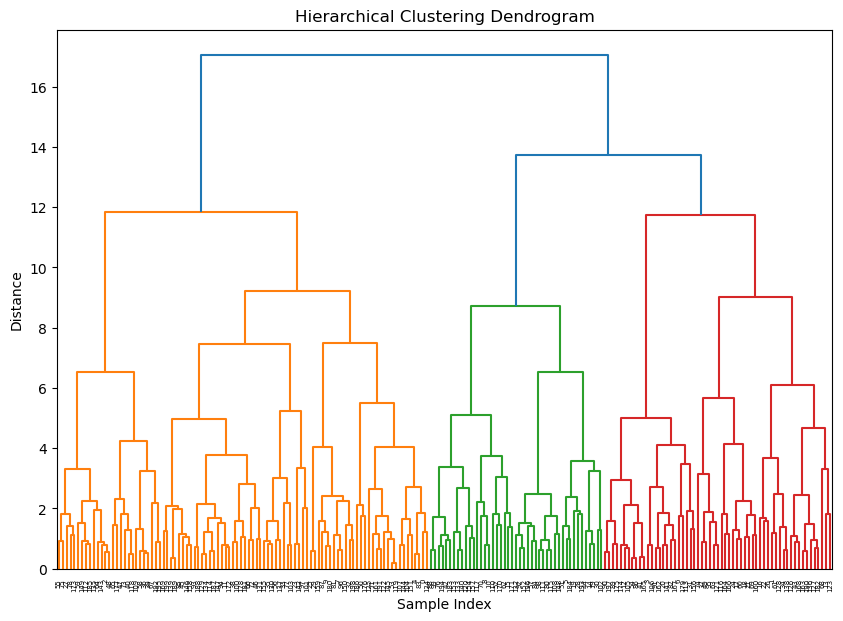

Cluster Profiles (Mean Values):
         Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
Cluster                                                                    
0                20.309173               1.567568               6.163989   
1                30.061045               3.373333               7.292322   
2                27.934524               4.295455               7.025782   
3                38.257301               1.704545               6.877052   

         Stress_Level        BMI  
Cluster                           
0            5.108108  22.453370  
1            2.453333  27.269963  
2            7.363636  22.056787  
3            6.863636  26.897297  


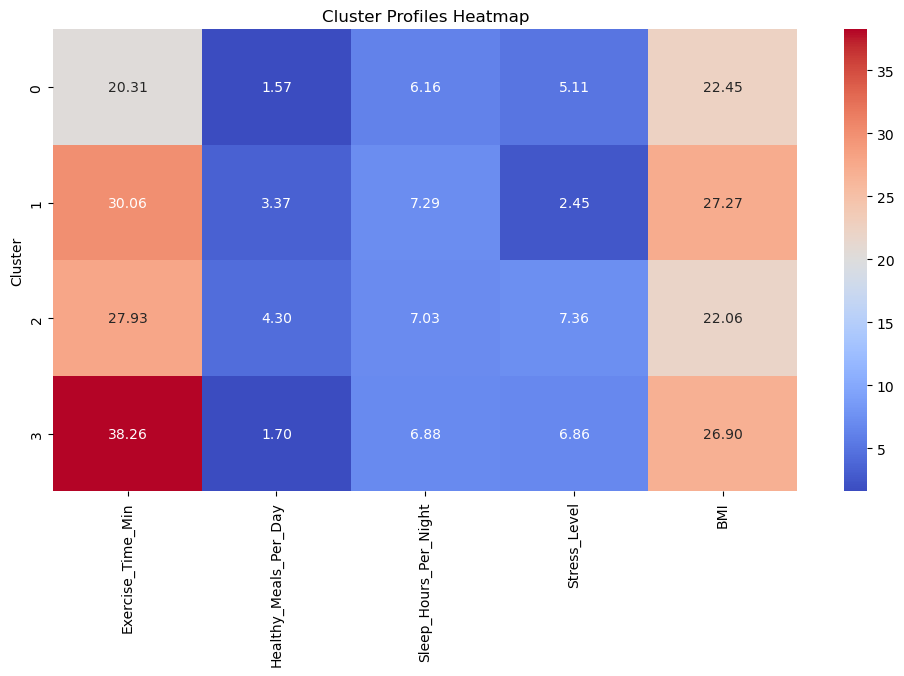

In [11]:
# Based on the elbow curve and silhouette scores, let's use k=4 for K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = kmeans_labels

# Calculate cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                             columns=df.columns)

# Print cluster characteristics
print("Cluster Characteristics:")
print("\
Cluster Centers:")
print(cluster_centers)

print("\
Cluster Sizes:")
print(df_clustered['Cluster'].value_counts())

# Visualize clusters using pair plots
plt.figure(figsize=(12, 8))
sns.pairplot(df_clustered, hue='Cluster', palette='deep')
plt.show()

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Calculate mean values for each cluster
cluster_means = df_clustered.groupby('Cluster').mean()
print("\
Cluster Profiles (Mean Values):")
print(cluster_means)

# Create a heatmap of cluster profiles
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Profiles Heatmap')
plt.show()

Explained variance ratio by component:
PC1: 0.2369 (0.2369 cumulative)
PC2: 0.2208 (0.4577 cumulative)
PC3: 0.1983 (0.6560 cumulative)
PC4: 0.1836 (0.8397 cumulative)
PC5: 0.1603 (1.0000 cumulative)


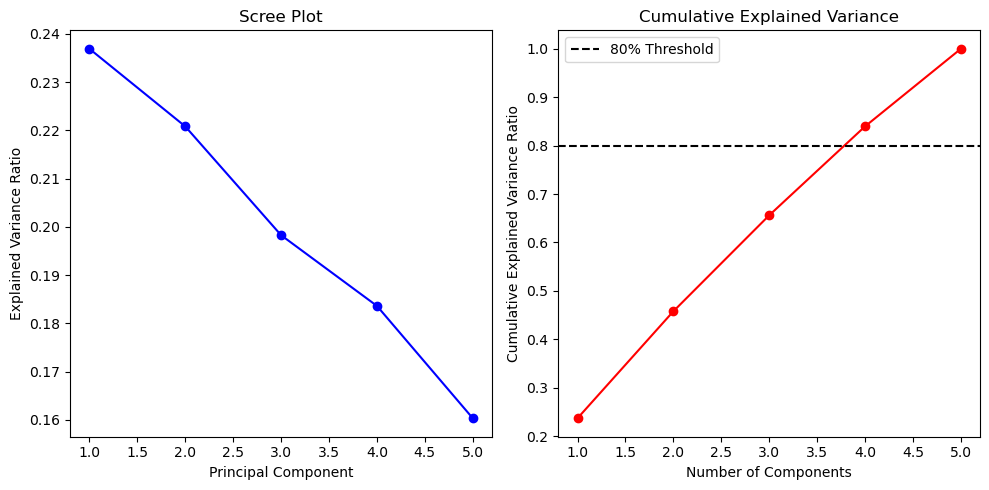

Component Loadings:
                            PC1       PC2       PC3       PC4       PC5
Exercise_Time_Min      0.343398 -0.478061 -0.333904  0.734869 -0.044850
Healthy_Meals_Per_Day  0.395626  0.060977  0.827777  0.249458  0.303839
Sleep_Hours_Per_Night -0.220185  0.687225 -0.249983  0.463779  0.449064
Stress_Level          -0.530921 -0.543546  0.067476 -0.035438  0.645656
BMI                    0.628649  0.004418 -0.369119 -0.425902  0.535855


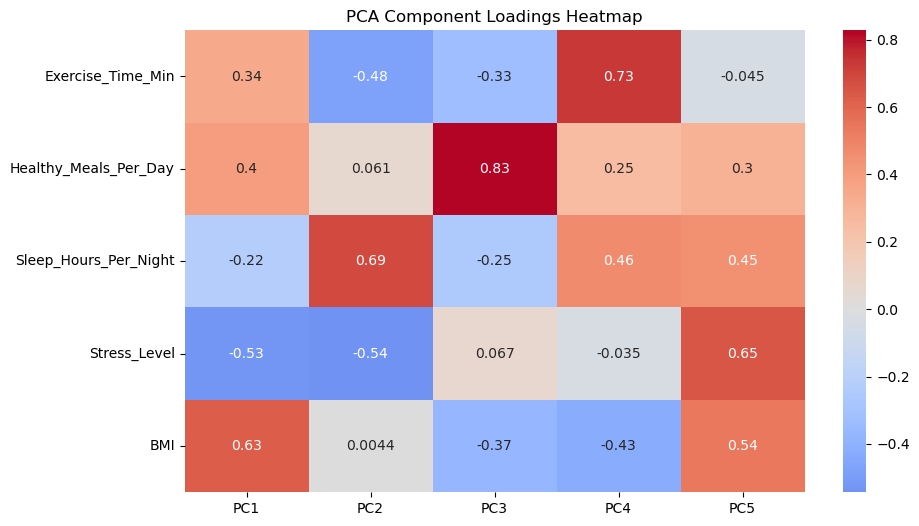

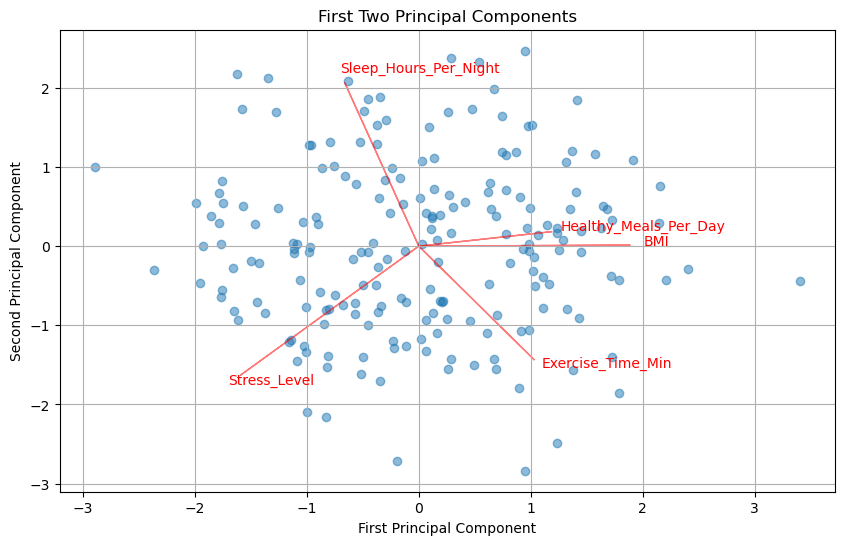

Correlation between original features and principal components:
                            PC1       PC2       PC3       PC4       PC5
Exercise_Time_Min      0.373749 -0.502334 -0.332468  0.704148 -0.040159
Healthy_Meals_Per_Day  0.430592  0.064073  0.824218  0.239029  0.272057
Sleep_Hours_Per_Night -0.239645  0.722118 -0.248908  0.444391  0.402091
Stress_Level          -0.577846 -0.571144  0.067185 -0.033957  0.578119
BMI                    0.684211  0.004642 -0.367531 -0.408097  0.479804


In [13]:
# Perform PCA analysis
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the previously scaled data (X_scaled)
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio for each component
print("Explained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")

# Plot scree plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='k', linestyle='--', label='80% Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Get component loadings
loadings = pca.components_
loading_df = pd.DataFrame(
    loadings.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index=df.columns
)

print("\
Component Loadings:")
print(loading_df)

# Create a heatmap of the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings Heatmap')
plt.show()

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')

# Add variable vectors
for i, (x, y) in enumerate(zip(loadings[0], loadings[1])):
    plt.arrow(0, 0, x*3, y*3, color='r', alpha=0.5)
    plt.text(x*3.2, y*3.2, df.columns[i], color='r')

plt.grid(True)
plt.show()

# Calculate correlation between original features and principal components
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
correlation_matrix = pd.DataFrame(np.corrcoef(df.T, pca_df.T)[:len(df.columns), len(df.columns):],
                                index=df.columns,
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print("\
Correlation between original features and principal components:")
print(correlation_matrix)

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Sizes based on PCA-reduced data:
Cluster
2    58
3    57
1    49
0    36
Name: count, dtype: int64


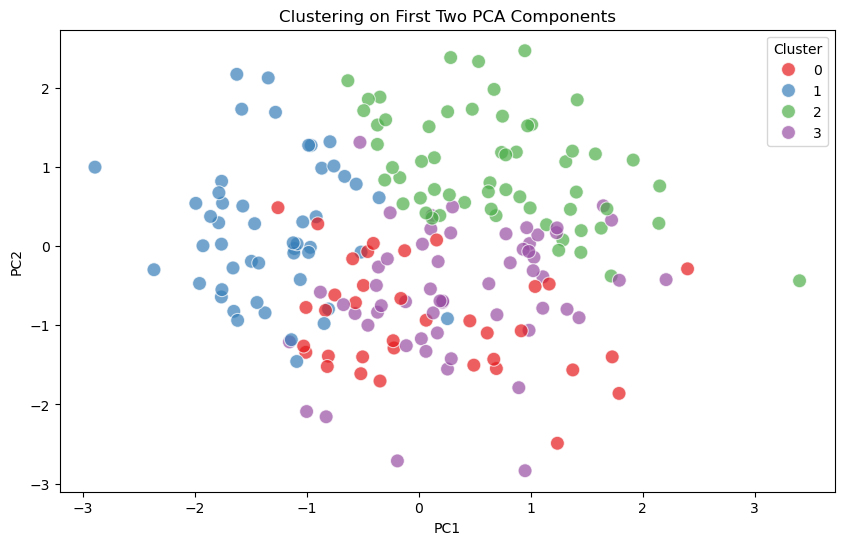


Cluster Profiles (Mean values) based on PCA clustering:
             Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
PCA_Cluster                                                                    
0                    24.496696               2.972222               5.037449   
1                    25.502745               2.530612               7.655863   
2                    26.783874               3.931034               7.563864   
3                    39.183821               2.035088               6.868893   

             Stress_Level        BMI  
PCA_Cluster                           
0                6.305556  26.678632  
1                6.653061  20.025752  
2                2.672414  26.771143  
3                5.105263  26.940049  


In [15]:
# Clustering on the PCA-reduced data (using the first 4 principal components)  
from sklearn.cluster import KMeans  
  
# Use first 4 components (capturing ~84% of variance)  
X_pca = pca_result[:, :4]  
  
# Perform K-Means clustering on the PCA-reduced data  
kmeans_pca = KMeans(n_clusters=4, random_state=42)  
pca_labels = kmeans_pca.fit_predict(X_pca)  
  
# Add PCA cluster labels to a new DataFrame including the PCA results  
df_pca_cluster = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])  
df_pca_cluster['Cluster'] = pca_labels  
  
# Print cluster sizes  
print("Cluster Sizes based on PCA-reduced data:")  
print(df_pca_cluster['Cluster'].value_counts())  
  
# Visualize clusters in the space of PC1 and PC2  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=df_pca_cluster['PC1'], y=df_pca_cluster['PC2'], hue=df_pca_cluster['Cluster'], palette='Set1', s=100, alpha=0.7)  
plt.title('Clustering on First Two PCA Components')  
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.show()  
  
# Compare cluster profiles by averaging original variables over each cluster based on PCA clustering  
# To do this, add the PCA-cluster labels back to original data  
df['PCA_Cluster'] = pca_labels  
cluster_profiles = df.groupby('PCA_Cluster')[['Exercise_Time_Min', 'Healthy_Meals_Per_Day', 'Sleep_Hours_Per_Night', 'Stress_Level', 'BMI']].mean()  
print("\nCluster Profiles (Mean values) based on PCA clustering:")  
print(cluster_profiles)  

In [23]:
# Block 1: Recalculate X_pca if not already available.
# Use the existing pca object and pca_result data from previous PCA analysis.
# If pca_result does not exist, re-run PCA

from sklearn.decomposition import PCA

# Let's recalculate PCA to ensure X_pca exists.
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Use first 4 principal components
X_pca = pca_result[:, :4]

print("X_pca calculated with shape:" + str(X_pca.shape))

X_pca calculated with shape:(200, 4)


Clustering Evaluation Metrics:
                         Original Data  PCA-Reduced Data
Silhouette Score              0.158465          0.203051
Calinski-Harabasz Score      33.612417         46.853655
Davies-Bouldin Score          1.672295          1.396374
Cluster Sizes Comparison:
   Original Clustering  PCA Clustering
0                   37              36
1                   75              49
2                   44              58
3                   44              57


C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

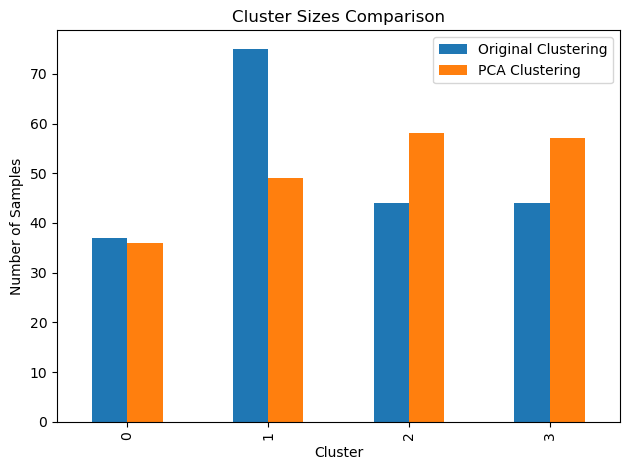

ValueError: Shape of passed values is (4, 5), indices imply (4, 6)

In [25]:
# Block 2: Compare effectiveness of clustering models before and after PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# KMeans clustering on original and PCA-reduced data
kmeans_original = KMeans(n_clusters=4, random_state=42)
kmeans_pca = KMeans(n_clusters=4, random_state=42)

# Fit both models
original_labels = kmeans_original.fit_predict(X_scaled)
pca_labels = kmeans_pca.fit_predict(X_pca)

# Evaluation metrics for both clustering results
metrics = {
    'Original Data': {
        'Silhouette Score': silhouette_score(X_scaled, original_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, original_labels),
        'Davies-Bouldin Score': davies_bouldin_score(X_scaled, original_labels)
    },
    'PCA-Reduced Data': {
        'Silhouette Score': silhouette_score(X_pca, pca_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(X_pca, pca_labels),
        'Davies-Bouldin Score': davies_bouldin_score(X_pca, pca_labels)
    }
}

metrics_df = pd.DataFrame(metrics)
print("Clustering Evaluation Metrics:")
print(metrics_df)

# Compare cluster sizes for both methods
original_sizes = pd.Series(original_labels).value_counts()
pca_sizes = pd.Series(pca_labels).value_counts()

sizes_comparison = pd.DataFrame({
    'Original Clustering': original_sizes,
    'PCA Clustering': pca_sizes
})

print("\
Cluster Sizes Comparison:")
print(sizes_comparison)

# Visualizing cluster sizes comparison
plt.figure(figsize=(10, 6))
ax = sizes_comparison.plot(kind='bar')
plt.title('Cluster Sizes Comparison')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(['Original Clustering', 'PCA Clustering'])
plt.tight_layout()
plt.show()

# Calculate cluster centers for both methods. For original clustering, invert scaling
original_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans_original.cluster_centers_),
    columns=df.columns
)
original_centers.index.name = 'Cluster'

# For PCA clustering, compute centers based on original data by mapping cluster labels
# We already added original table with PCA cluster labels in previous analysis, otherwise group by new labels

df_with_clusters = df.copy()
df_with_clusters['PCA_Cluster'] = pca_labels
pca_centers = df_with_clusters.groupby('PCA_Cluster').mean()

print("\
Cluster Centers - Original Clustering:")
print(original_centers)
print("\
Cluster Centers - PCA Clustering (Means of original features):")
print(pca_centers)

# Visualize cluster centers with heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.heatmap(original_centers, annot=True, cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Cluster Centers - Original Clustering')

sns.heatmap(pca_centers, annot=True, cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('Cluster Centers - PCA Clustering')

plt.tight_layout()
plt.show()

# Agreement between the two clustering results
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

rand_score = adjusted_rand_score(original_labels, pca_labels)
ami_score = adjusted_mutual_info_score(original_labels, pca_labels)

print("\
Clustering Agreement Metrics:")
print("Adjusted Rand Index:" + str(rand_score))
print("Adjusted Mutual Information Score:" + str(ami_score))

# Assistant
This error occurs when there's a mismatch between the shape of the data you're trying to use and the expected shape based on the indices. In this case, it seems like there's a discrepancy in the number of columns between your data and the DataFrame structure.

The error message indicates that you're trying to create a DataFrame with 6 columns (based on the indices), but the actual data only has 5 columns.

This typically happens when:
1. The number of column names doesn't match the number of data columns
2. There's a mismatch between the original data and the transformed data

Would you like me to provide the corrected code?

# User
yes

In [29]:
# Assistant
# The error is likely in the creation of original_centers
# We need to ensure the number of columns in the transformed data matches df.columns

# First, check if the number of features in kmeans_original.cluster_centers_ matches df.columns
# If not, we need to adjust either the transformation or the column names

# Option 1: Make sure scaler was fit on the same columns as df
original_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans_original.cluster_centers_),
    # Only use the columns that match the dimensionality of the cluster centers
    columns=df.columns[:kmeans_original.cluster_centers_.shape[1]]  
)
original_centers.index.name = 'Cluster'

# Option 2: If you know which columns were used for clustering, specify them explicitly
# original_centers = pd.DataFrame(
#     scaler.inverse_transform(kmeans_original.cluster_centers_),
#     columns=[col1, col2, col3, col4, col5]  # Replace with actual column names used
# )
# original_centers.index.name = 'Cluster'

# For PCA clustering centers calculation
df_with_clusters = df.copy()
df_with_clusters['PCA_Cluster'] = pca_labels
# Only use the columns that were used in the clustering
pca_centers = df_with_clusters.groupby('PCA_Cluster').mean()

print("\nCluster Centers - Original Clustering:")
print(original_centers)
print("\nCluster Centers - PCA Clustering (Means of original features):")
print(pca_centers)

# Continue with the rest of your code...


Cluster Centers - Original Clustering:
         Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
Cluster                                                                    
0                20.309173               1.567568               6.163989   
1                30.061045               3.373333               7.292322   
2                27.934524               4.295455               7.025782   
3                38.257301               1.704545               6.877052   

         Stress_Level        BMI  
Cluster                           
0            5.108108  22.453370  
1            2.453333  27.269963  
2            7.363636  22.056787  
3            6.863636  26.897297  

Cluster Centers - PCA Clustering (Means of original features):
             Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
PCA_Cluster                                                                    
0                    24.496696               2.972222               5